# Финальный проект "Телеком"

__Содержание__
- [Описание проекта](#Описание-проекта)
- [План](#План)
- [Код](#Код)
   - [Предварительная обработка](#Предварительная-обработка)
   - [EDA](#EDA)
   - [Моделирование](#Моделирование)
   - [Тестирование](#Тестирование)
- [Отчёт](#Отчёт)

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

__Описание услуг__  
Оператор предоставляет два основных типа услуг:
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. _digital subscriber line_, «цифровая абонентская линия») или оптоволоконный кабель (_Fiber optic_).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

__Описание данных__  
Данные состоят из файлов, полученных из разных источников:
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

__Описание полей в данных__
- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип договора: ежемесячный, годовой и т.д,
- `PaperlessBilling` – факт выставления счёта на электронную почту,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги,
- `Dependents` – наличие иждивенцев,
- `SeniorCitizen` – наличие пенсионного статуса по возрасту,
- `Partner` – наличие супруга(и),
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка.

## План

- Предварительная подготовка данных
- Исследовательский анализ данных
- Моделирование
- Тестирование
- Формирование отчёта

In [1]:
import os

import pandas as pd

In [2]:
DATA_PATH = os.path.join('datasets', 'final_provider')

RANDOM_STATE = 100423

In [3]:
contract_df = pd.read_csv(os.path.join(DATA_PATH, 'contract.csv'))
personal_df = pd.read_csv(os.path.join(DATA_PATH, 'personal.csv'))
internet_df = pd.read_csv(os.path.join(DATA_PATH, 'internet.csv'))
phone_df = pd.read_csv(os.path.join(DATA_PATH, 'phone.csv'))

---

In [4]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
contract_df['customerID'].nunique()

7043

In [7]:
pd.to_datetime(contract_df['BeginDate']).head()  # отлично, переводится без проблем

0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: BeginDate, dtype: datetime64[ns]

In [8]:
pd.to_datetime(contract_df.loc[contract_df['EndDate'] != 'No', 'EndDate']).head()  # отлично, переводится без проблем

2    2019-12-01
4    2019-11-01
5    2019-11-01
8    2019-11-01
13   2019-10-01
Name: EndDate, dtype: datetime64[ns]

In [9]:
contract_df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [10]:
contract_df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
contract_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

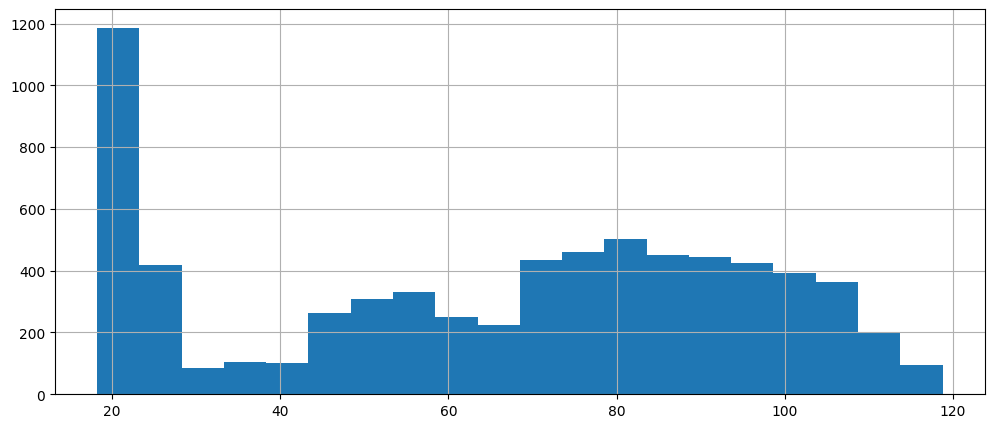

In [12]:
_ = contract_df['MonthlyCharges'].hist(bins=20, figsize=(12, 5))

In [13]:
contract_df.loc[contract_df['TotalCharges'] != ' ', 'TotalCharges'].astype('float').head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [14]:
contract_df.loc[contract_df['TotalCharges'] == ' ', 'TotalCharges']  # эти примеры можно и откинуть

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

---

In [15]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [16]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [17]:
personal_df['customerID'].nunique()

7043

In [18]:
personal_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
personal_df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [20]:
personal_df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
personal_df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

---

In [22]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [23]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [24]:
internet_df['customerID'].nunique()

5517

In [25]:
internet_df['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [26]:
internet_df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
internet_df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
internet_df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
internet_df['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
internet_df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
internet_df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

---

In [32]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [33]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [34]:
phone_df['customerID'].nunique()

6361

In [35]:
phone_df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

### Вопросы:

1. Странная гистограмма у `MonthlyCharges`: много малых значений. Это нормально?
2. В отличие от остальных признаков `SeniorCitizen` закодирован [0, 1]. Верно понимаю, что 1 - пенсионер, 0 - нет?

## Код

### Предварительная обработка

### EDA

### Моделирование

### Тестирование

## Отчёт